<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Steepest_Descent_Method_Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 4
Find the minimizer of $f (x_1,x_2,x_3) = (x_1-4)^{2} + (x_2-3)^{2} + (x_3+4)^{2}$ using:

(a) The steepest descent method,

(b) The constant step size with α = 0.1,

with $x_0 = \begin{pmatrix}
  4 \\
  2 \\
  −1 \\
   \end{pmatrix}$

and stopping criteria $|| \bigtriangledown f(x)||$ < 0.001.

### Steepest Descent Method

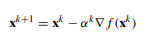

##Definición de la función a minimizar y su gradiente

In [37]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [38]:
def f(x1,x2,x3):
    return ((x1-4)**2)+((x2-3)**2)+((x3+4)**2)

In [59]:
def grad(x1,x2,x3): 
    return np.array([2*(x1-4), 
                     2*(x2-3),
                     2*(x3+4)])

## Programación de los métodos

### Gradiente desendiente paso optimizado

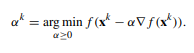

In [57]:
def gd1(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 3))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1],x[2])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1],x[2]-s*g[2])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1],xs[i+1,2])-f(xs[i,0],xs[i,1],xs[i,2]))/max(1,abs(f(xs[i,0],xs[i,1],xs[i,2])))
    if tol < epsi:
      break
  return xs,i+1

### Gradiente desendiente paso fijo

In [78]:
def gd2(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 3))
  xs[0,:] = x
  
  for i in range(max_iter):
      x = x - a * grad(x[0],x[1],x[2])
      xs[i+1,:] = x

      #tolerancia: criterio de finalización
      tol = abs(f(xs[i+1,0],xs[i+1,1],xs[i+1,2])-f(xs[i,0],xs[i,1],xs[i,2]))/max(1,abs(f(xs[i,0],xs[i,1],xs[i,2])))
      if tol < epsi: #en caso tal de no encontrar un optimo finalizar con el algoritmo
        break
  return xs,i+1

## Solución

### (a) Con gradiente desendiente de paso optimizado

In [50]:
x = np.array([-0.5,2,0])
epsi = 0.001;
max_iter = 1000

In [60]:
res1 = gd1(x, f, grad, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]

4.0 3.0 -4.0


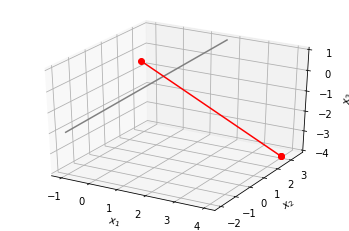

In [82]:
from mpl_toolkits.mplot3d import axes3d
xx = np.linspace(-1, 1.75)
yy = np.linspace(-2, 3.5)
zz = np.linspace(-2, 1)
X, Y, W = np.meshgrid(xx, yy, zz)

Z = ((X-4)**2)+((Y-3)**2)+((W+4)**2)
function = f(xs1[0:i1+1,0],xs1[0:i1+1,1],xs1[0:i1+1,2])
#c = plt.contour(X, Y, Z, np.flip(function))

ax = plt.axes(projection='3d')
ax.plot3D(xx, yy, zz, 'gray')

ax.plot3D(xs1[0:i1+1,0],xs1[0:i1+1,1],xs1[0:i1+1,2],'-ro')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$');

print(xs1[i1,0],xs1[i1,1],xs1[i1,2])
#se alcanza el mínimo en una menor cantidad de operaciones a el de paso fijo

Text(0, 0.5, 'f(x)')

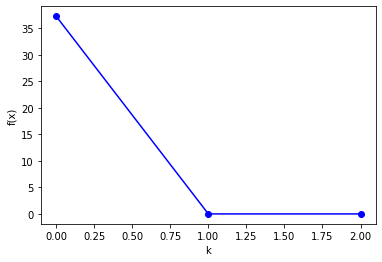

In [67]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1],xs1[0:i1+1,2]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### (b) Con gradiente desendiente de paso fijo



In [76]:
x = np.array([4,2,-1])
max_iter = 1000
epsi = 0.001 #tolerancia
a = 0.1 #tamaño de paso fijo

In [79]:
res2 = gd2(x, grad, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]

In [80]:
"""xx = np.linspace(-1, 1.75)
yy = np.linspace(-2, 3.5)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X + Y) + 0.05*np.exp(X - 2*Y) + 1*np.exp(-X)
function = f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')"""
print(xs2[i2,0],xs2[i2,1],xs2[i2,2]) #imprimir los valores mínimos encontrados para x1 y x2

4.0 2.9884707849539316 -3.9654123548617948


Text(0, 0.5, 'f(x)')

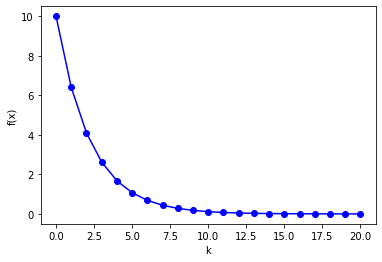

In [81]:
#graficamos los pasos
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1],xs2[0:i2+1,2]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')